Batches:   0%|          | 0/32 [00:00<?, ?it/s]

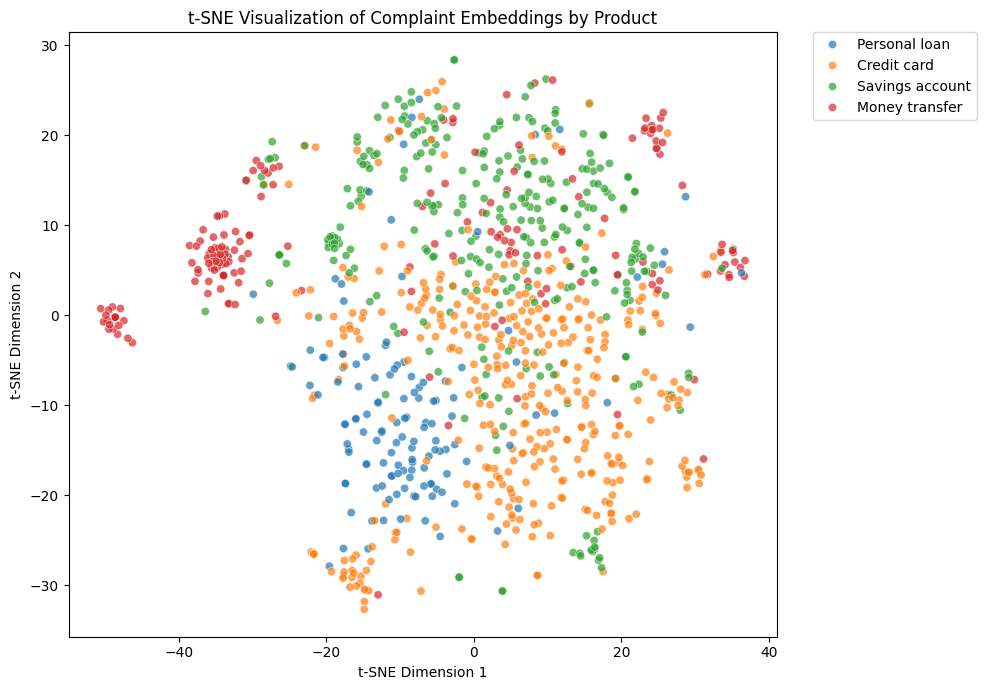

In [ ]:
import sys
sys.path.append("..") 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer

# Step 1: Load cleaned complaint data
df = pd.read_csv("../data/filtered_complaints.csv")
# Step 2: Keep non-empty cleaned_narratives
df = df[df["cleaned_narrative"].notnull() & (df["cleaned_narrative"].str.strip() != "")]
# Step 3: Sample for faster embedding (optional)
sample_df = df.sample(n=1000, random_state=42).reset_index(drop=True)
# Step 4: Encode text
texts = sample_df["cleaned_narrative"].tolist()
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
embeddings = model.encode(texts, show_progress_bar=True)
# Step 5: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
reduced_embeddings = tsne.fit_transform(embeddings)
# Step 6: Add results to DataFrame
sample_df["tsne_1"] = reduced_embeddings[:, 0]
sample_df["tsne_2"] = reduced_embeddings[:, 1]
# Encode product labels for color coding
le = LabelEncoder()
sample_df["product_label"] = le.fit_transform(sample_df["product"])
# Step 7: Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="tsne_1",
    y="tsne_2",
    hue="product",
    palette="tab10",
    data=sample_df,
    legend="full",
    alpha=0.7
)
plt.title("t-SNE Visualization of Complaint Embeddings by Product")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()



This **t-SNE visualization** shows a **2D projection of complaint embeddings**, color-coded by **product type** (e.g., *Credit card, Personal loan, Savings account, Money transfer*). Here's what the plot tells us:

###  Interpretation:

####  **Cluster Formation**

* we can clearly observe **distinct clusters**, especially for:

  * **Money transfer** (red): Strong tight clusters suggesting users express consistent language patterns or concerns around this product.
  * **Credit card** (orange): Spread but with noticeable grouping shows more variation in how people complain but still enough similarity to form dense areas.

####  **Semantic Similarity**

* t-SNE groups similar high-dimensional vectors close together in 2D.
* So, points closer together on the plot represent **complaints with semantically similar content**.
* Products that are **clustered separately** (e.g., red blobs) suggest complaints in that category are **semantically distinct** from others.

####  **Overlap**

* Some **overlap between Credit Card and Savings Account**: This could indicate similar complaint patterns (e.g., billing errors, service issues) shared between those categories.
* A few **outlier points** scattered in all categories these might represent:

  * Misclassified complaints,
  * Multi-product complaints,
  * Or noisy/ambiguous narratives.


###  Business Insight:

| Observation                   | Implication                                                         |
| ----------------------------- | ------------------------------------------------------------------- |
| Tight clusters                | Consistent complaint themes  easier for automation (e.g., routing) |
| Overlap between some products | May require more fine-grained labeling or better embeddings         |
| Outliers                      | Suggest further data cleaning or review for model training          |


###  Actionable Next Steps:

* Use **cluster labels** from this plot to train a **complaint categorization model**.
* Flag **outliers** for manual review or possible quality issues.
* Apply this insight in **RAG prompt engineering** by retrieving clusters as contextual knowledge.